# TEXT CLEANING IN PYTHON

In [1]:
# warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# creating a bunch of sentences
raw_docs = ['I am writing some very basic english sentences', 
           "I'm just writing it for the demo PURPOSE to make audience understand the basic .",
           "The point is to _learn HOW it works_ on #simple # data."]

In [3]:
# importing nltk package - natural language toolkit
import nltk

In [4]:
# nltk.download()

# python -m nltk.downloader all

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Step-1 Convert to Lower Case

In [5]:
import string
raw_docs = [doc.lower() for doc in raw_docs]
print(raw_docs)

['i am writing some very basic english sentences', "i'm just writing it for the demo purpose to make audience understand the basic .", 'the point is to _learn how it works_ on #simple # data.']


### Step-2 Tokenization

In [6]:
# word tokenize
from nltk.tokenize import word_tokenize
tokenized_docs = [word_tokenize(doc) for doc in raw_docs]
print(tokenized_docs)

[['i', 'am', 'writing', 'some', 'very', 'basic', 'english', 'sentences'], ['i', "'m", 'just', 'writing', 'it', 'for', 'the', 'demo', 'purpose', 'to', 'make', 'audience', 'understand', 'the', 'basic', '.'], ['the', 'point', 'is', 'to', '_learn', 'how', 'it', 'works_', 'on', '#', 'simple', '#', 'data', '.']]


In [7]:
# sentence tokenization

from nltk.tokenize import sent_tokenize
sent_token = [sent_tokenize(doc) for doc in raw_docs]
print(sent_token)

[['i am writing some very basic english sentences'], ["i'm just writing it for the demo purpose to make audience understand the basic ."], ['the point is to _learn how it works_ on #simple # data.']]


### Step-3 Punctuation Removal

In [11]:
# Removing punctuation
import re
regex = re.compile('[%s]' % re.escape(string.punctuation)) #see documentation here: http://docs.python.org/2/library/string.html

tokenized_docs_no_punctuation = []

for review in tokenized_docs:
    new_review = []
    for token in review:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    
    tokenized_docs_no_punctuation.append(new_review)
    
print(tokenized_docs_no_punctuation)

[['i', 'am', 'writing', 'some', 'very', 'basic', 'english', 'sentences'], ['i', 'm', 'just', 'writing', 'it', 'for', 'the', 'demo', 'purpose', 'to', 'make', 'audience', 'understand', 'the', 'basic'], ['the', 'point', 'is', 'to', 'learn', 'how', 'it', 'works', 'on', 'simple', 'data']]


### Step-4 Removing Stopwords

In [12]:
# Cleaning text of stopwords
from nltk.corpus import stopwords

tokenized_docs_no_stopwords = []

for doc in tokenized_docs_no_punctuation:
    new_term_vector = []
    for word in doc:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
    
    tokenized_docs_no_stopwords.append(new_term_vector)

print(tokenized_docs_no_stopwords)

[['writing', 'basic', 'english', 'sentences'], ['writing', 'demo', 'purpose', 'make', 'audience', 'understand', 'basic'], ['point', 'learn', 'works', 'simple', 'data']]


### Step-5 Stemming and Lemmantization

In [13]:
# Stemming and Lemmatization
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
wordnet = WordNetLemmatizer()

preprocessed_docs = []

for doc in tokenized_docs_no_stopwords:
    final_doc = []
    for word in doc:
        #final_doc.append(porter.stem(word))
        final_doc.append(wordnet.lemmatize(word))
    
    preprocessed_docs.append(final_doc)

print(preprocessed_docs)

[['writing', 'basic', 'english', 'sentence'], ['writing', 'demo', 'purpose', 'make', 'audience', 'understand', 'basic'], ['point', 'learn', 'work', 'simple', 'data']]


# FEATURE EXTRACTION FROM TEXT

### Countvectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["hello, my name is Aman and I am  a data scinetist."]
text1 = ["You are watching unfold data science, Aman Aman"]

In [25]:
# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

CountVectorizer()

In [26]:
# summarize
print(vectorizer.vocabulary_)

{'hello': 4, 'my': 6, 'name': 7, 'is': 5, 'aman': 1, 'and': 2, 'am': 0, 'data': 3, 'scinetist': 8}


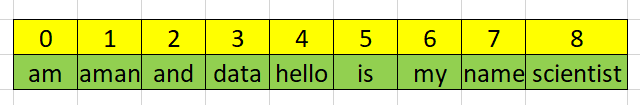

In [28]:
from IPython.display import Image
Image(filename='/Users/macbook/Desktop/wordvector.png') 

In [29]:
# encode document
newvector = vectorizer.transform(text1)

# summarize encoded vector
print(newvector.toarray())

[[0 2 0 1 0 0 0 0 0]]


### TF - IDF

#### Purpose of TF-IDF is to highlight words which are frequent in a document but not across documents

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["Aman is a data scientist in India","This is unfold data science","Data Science is a promising career"]

In [31]:
# create the transform
vectorizer = TfidfVectorizer()

In [32]:
# tokenize and build vocab
vectorizer.fit(text)

TfidfVectorizer()

In [33]:
#Focus on IDF VALUES
print(vectorizer.idf_)

[1.69314718 1.69314718 1.         1.69314718 1.69314718 1.
 1.69314718 1.28768207 1.69314718 1.69314718 1.69314718]


In [34]:
# summarize
print(vectorizer.vocabulary_)

{'aman': 0, 'is': 5, 'data': 2, 'scientist': 8, 'in': 3, 'india': 4, 'this': 9, 'unfold': 10, 'science': 7, 'promising': 6, 'career': 1}


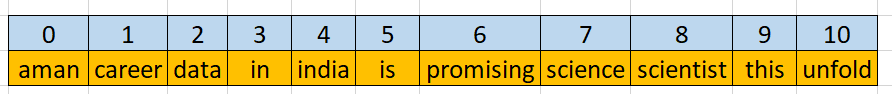

In [35]:
text_as_input = text[2]
text_as_input

'Data Science is a promising career'

In [36]:
# encode document
vector = vectorizer.transform([text_as_input])

In [37]:
# summarize encoded vector
print(vector.toarray())

[[0.         0.55249005 0.32630952 0.         0.         0.32630952
  0.55249005 0.42018292 0.         0.         0.        ]]
